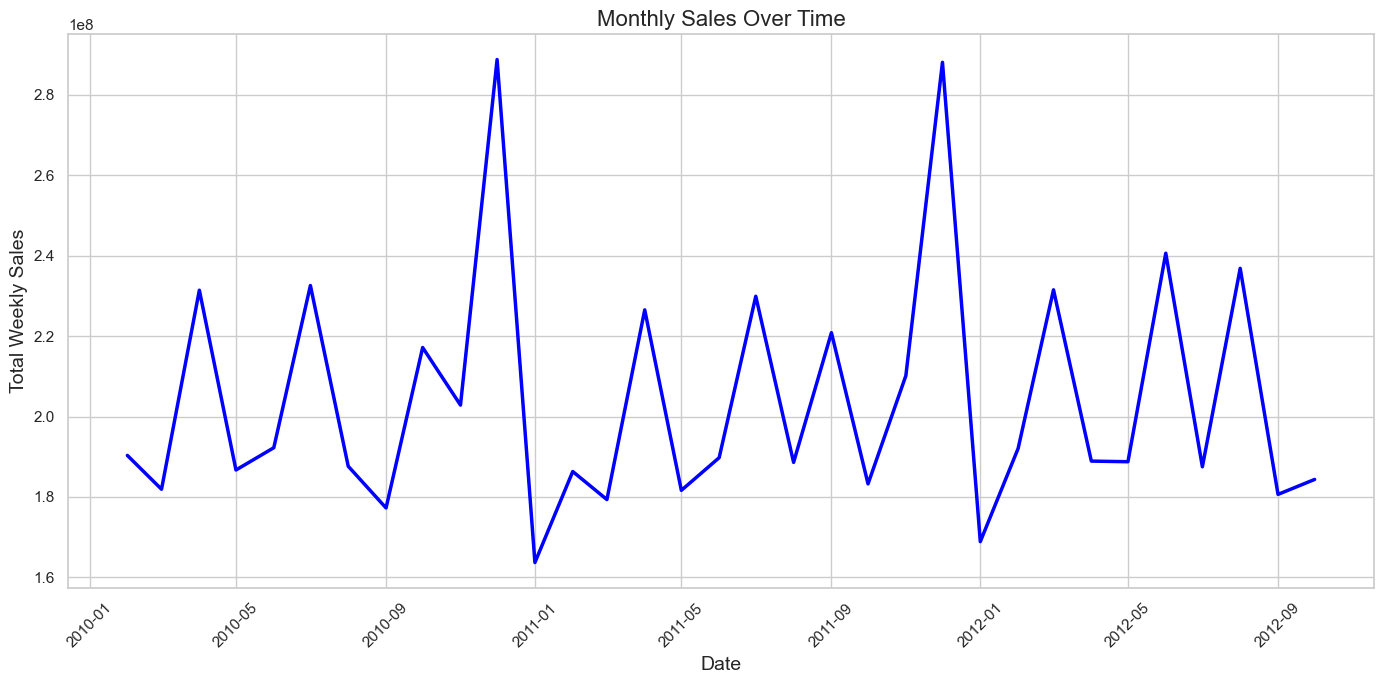

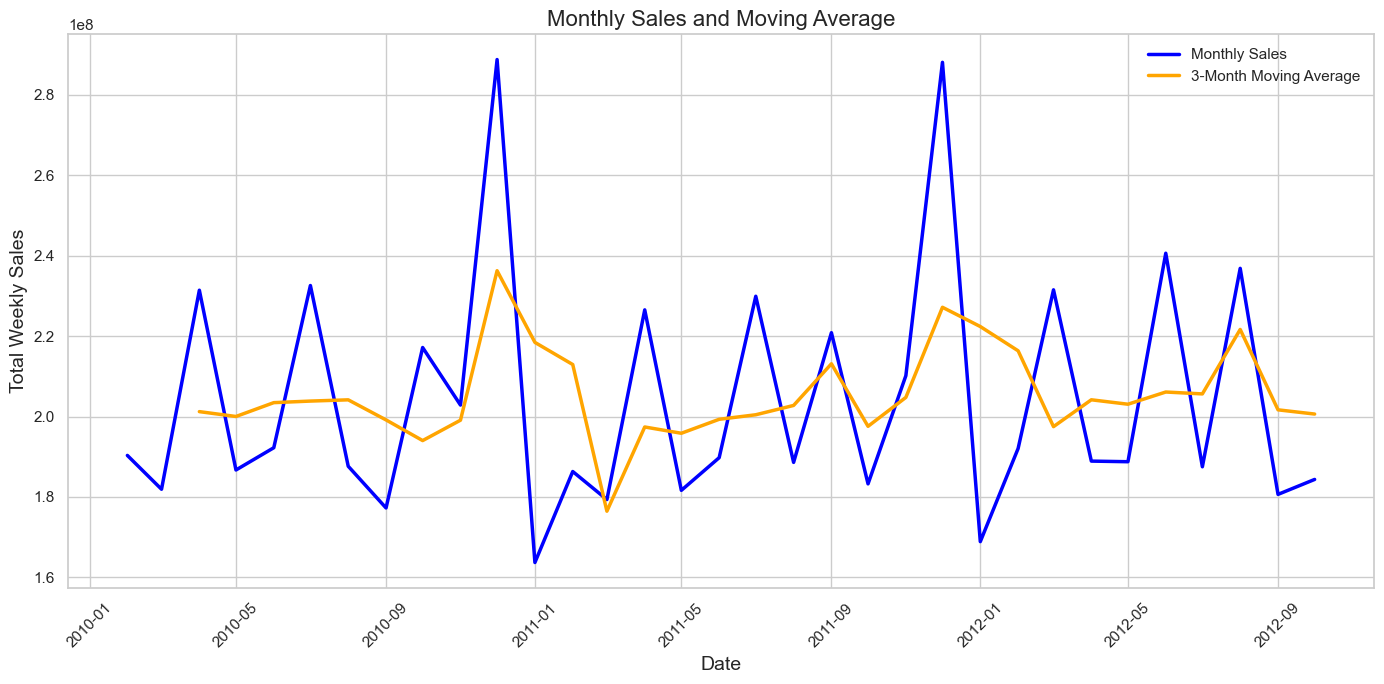

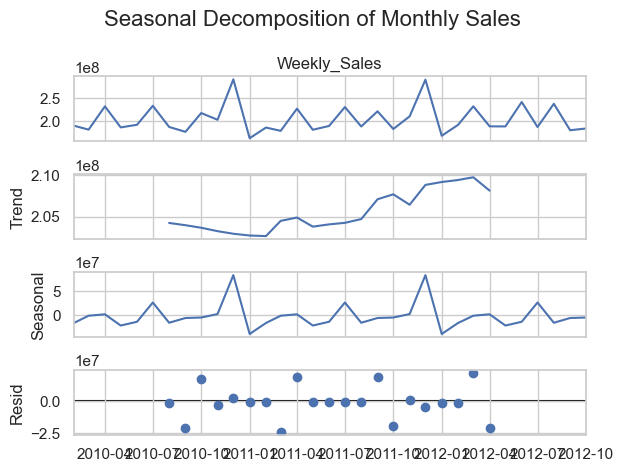

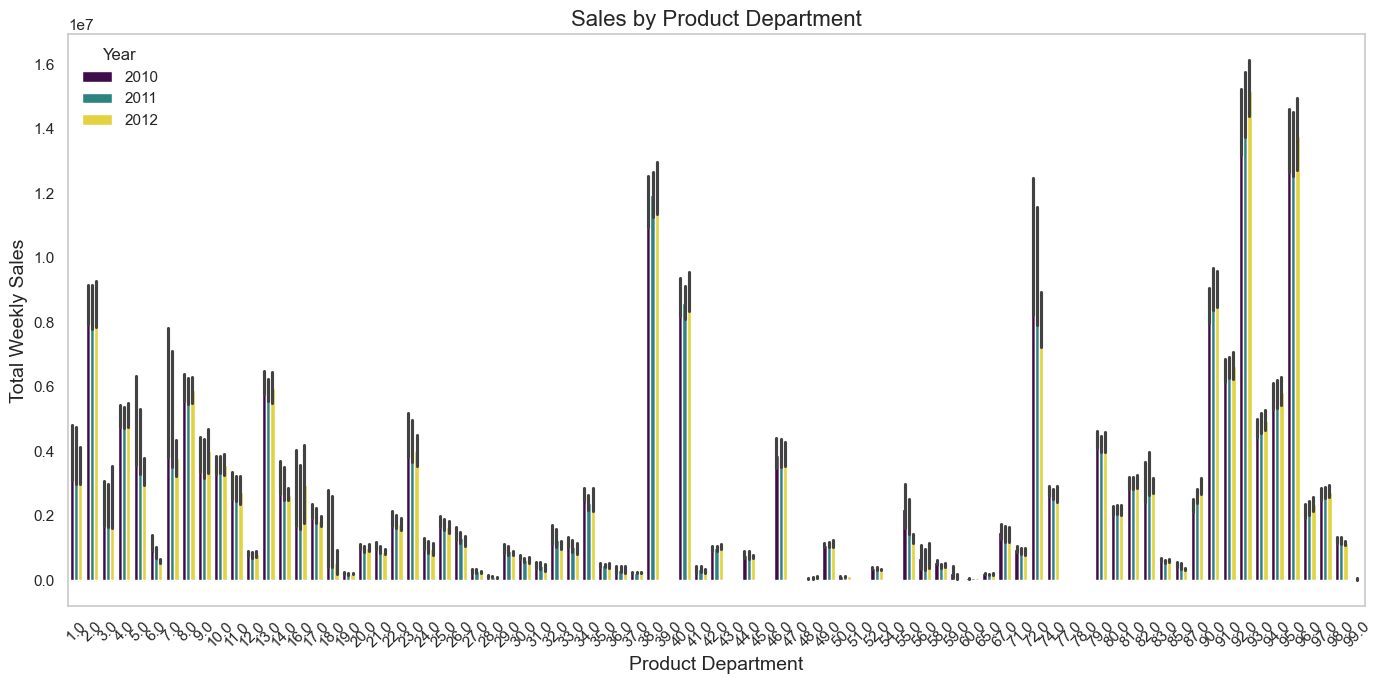

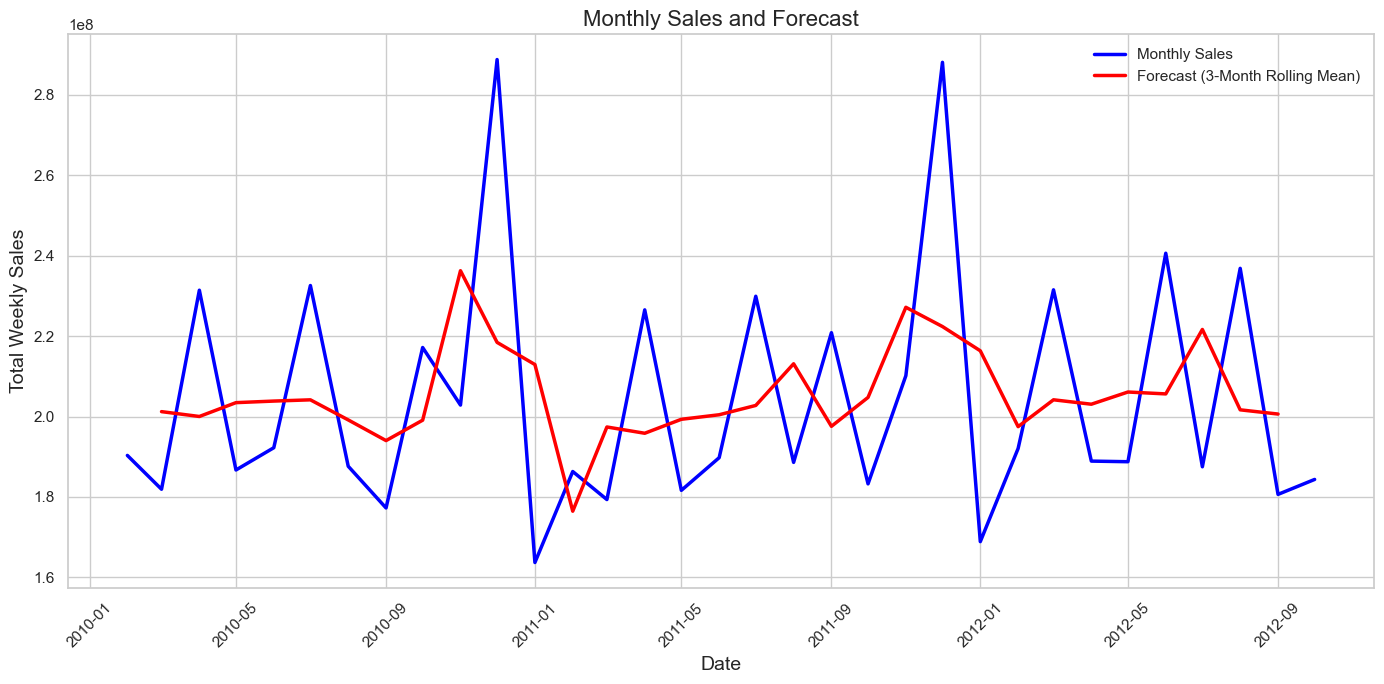

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_csv('walmart_cleaned.csv')

data['Date'] = pd.to_datetime(data['Date'])

# Extract month and year for analysis
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

monthly_sales = data.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()

# Create a 'Date' column for plotting
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")
sns.lineplot(data=monthly_sales, x='Date', y='Weekly_Sales', color='blue', linewidth=2.5)
plt.title('Monthly Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Weekly Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

monthly_sales['Moving_Average'] = monthly_sales['Weekly_Sales'].rolling(window=3).mean()

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='Date', y='Weekly_Sales', label='Monthly Sales', color='blue', linewidth=2.5)
sns.lineplot(data=monthly_sales, x='Date', y='Moving_Average', label='3-Month Moving Average', color='orange', linewidth=2.5)
plt.title('Monthly Sales and Moving Average', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Weekly Sales', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

monthly_sales.set_index('Date', inplace=True)
decomposition = seasonal_decompose(monthly_sales['Weekly_Sales'], model='additive')
fig = decomposition.plot()
plt.suptitle('Seasonal Decomposition of Monthly Sales', fontsize=16)
plt.tight_layout()
plt.show()

product_sales = data.groupby(['Dept', 'Year', 'Month'])['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=product_sales, x='Dept', y='Weekly_Sales', hue='Year', palette='viridis')
plt.title('Sales by Product Department', fontsize=16)
plt.xlabel('Product Department', fontsize=14)
plt.ylabel('Total Weekly Sales', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

monthly_sales['Forecast'] = monthly_sales['Weekly_Sales'].rolling(window=3).mean().shift(-1)

forecast_df = monthly_sales[['Forecast']].reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='Date', y='Weekly_Sales', label='Monthly Sales', color='blue', linewidth=2.5)
sns.lineplot(data=forecast_df, x='Date', y='Forecast', label='Forecast (3-Month Rolling Mean)', color='red', linewidth=2.5)
plt.title('Monthly Sales and Forecast', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Weekly Sales', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
